In [41]:
import numpy as np
import torch
import cv2
import json
from pathlib import Path
from PIL import Image
from typing import Any, Callable, Dict, List, Optional, Tuple, cast
import os
import random
from lib import *
from dataset import Dataset_Base
from model import VIOLET_Base
from agent import Agent_Base

In [42]:
class Dataset_Retrieval(Dataset_Base):
    def __init__(self, args, split):
        super().__init__(args)
        
        self.img = pickle.load(open('./_data/img_%s.pkl'%(self.args['dataset']), 'rb'))
        self.txt = json.load(open('./_data/txt_%s.json'%(self.args['task']), 'r'))[split]
        
    def __len__(self):
        return len(self.txt)
    
    def __getitem__(self, idx):
        item = self.txt[idx]
        
        img = []
        for b in self.img[item['video']]:
            # img.append(self.str2img(b).unsqueeze(0))
            img.append(b)
        # img = T.cat(img, dim=0)
        
        txt, mask = self.str2txt(item['caption'])
        
        return img, txt, mask


In [43]:
args = {
    "path_ckpt": "./_data/ckpt_violet_pretrain.pt",
    "dataset" : "msrvtt",
    "task" : "msrvtt-retrieval",
    "size_img": 224,
    "size_txt": 25,
    "batch_size" : 6
}

In [44]:
data_train, data_val, data_test = [torch.utils.data.DataLoader(Dataset_Retrieval(args, split),
                                                                batch_size = args['batch_size'],
                                                                shuffle = (split == 'train'),
                                                                num_workers = 32,
                                                            )
                                    for split in ['train', 'val', 'test']]

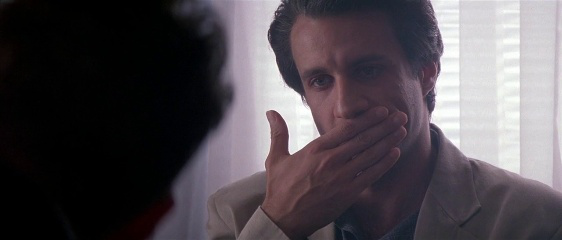

(None, (562, 240))

In [45]:
example_img_path = Path('/home/jianghui/dataset/VideoReorder-MovieNet/example/in_domain_2830/', '2830_0.jpg')
example_img_Image = Image.open(example_img_path)
display(example_img_Image), example_img_Image.size

  0%|          | 0/34 [00:00<?, ?it/s]

img[0][0] is
 /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCADwAUADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDwA0lKetJQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAKetJQetFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRR

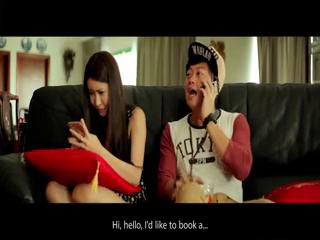

  0%|          | 0/34 [00:00<?, ?it/s]

(320, 240)


In [46]:
for img, text, mask in tqdm(data_train, ascii=True):
    print('img[0][0] is\n', img[0][0])
    print('img[0][0] type is\n', type(img[0][0]))
    img_Image = Image.open(io.BytesIO(base64.b64decode(img[0][0]))).convert('RGB')
    display(img_Image)
    print(img_Image.size)
    # print('text is\n', text)
    # print('mask is\n', mask)
    break


In [47]:
# See .pkl
dataset_pkl = pickle.load(open('./_data/img_msrvtt.pkl', 'rb'))
for i in dataset_pkl:
    print(i)

video5029
video5564
video6602
video1365
video2606
video5848
video6580
video3412
video2027
video206
video3232
video966
video5412
video2126
video6403
video6636
video6788
video3206
video5709
video4779
video576
video5442
video19
video5322
video279
video5875
video1460
video2929
video1499
video602
video5741
video5338
video3312
video4090
video2710
video5399
video2790
video4437
video3199
video2119
video4922
video937
video2250
video2799
video6531
video2559
video6134
video4362
video4557
video6287
video4520
video1432
video1788
video2141
video816
video5692
video3144
video533
video906
video4577
video5730
video177
video4461
video6030
video3932
video1307
video1851
video5385
video1141
video2776
video3340
video1463
video2841
video4146
video5038
video660
video2295
video2401
video4141
video859
video6064
video6293
video4644
video5187
video771
video3666
video2695
video6312
video2890
video6841
video2453
video2494
video4359
video2293
video3846
video1937
video1120
video6153
video5097
video4763
video1187
video

In [52]:
x = xrange(10)
x

NameError: name 'xrange' is not defined

In [55]:
pbar = tqdm(["a", "b", "c", "d"])
for char in pbar:
    time.sleep(2)
    pbar.set_description("Processing %s" % char)
pbar.close()

Processing d: 100%|██████████| 4/4 [00:08<00:00,  2.00s/it]


In [48]:
import time
for i in tqdm(range(10)):
    time.sleep(2)

100%|██████████| 10/10 [00:20<00:00,  2.00s/it]
